<a href="https://colab.research.google.com/github/divz-codess/divz-codess/blob/main/NNprogassignDivyangiRaghav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: If x = [2,3] , b =4 and w = [0,1] write the program to find the following:
> 1.   Neuron


In [2]:
import numpy as np

In [19]:
# Define the inputs
x = np.array([2, 3])
w = np.array([0, 1])
b = 4

# Calculate the neuron activation
neuron = np.dot(w, x) + b

print("Neuron Output:", neuron)


Neuron Output: 7


>2.   Combining Neuron into Neural Network

In [20]:
import numpy as np

# Define the inputs
x = np.array([2, 3])

# Define the weights and biases for the neuron
w = np.array([0, 1])
b = 4

# Define the activation function for the neuron
def linear_activation(x):
    return x

# Define the weights and biases for the neural network
w1 = np.array([w])
b1 = np.array([b])
w2 = np.array([[1]])  # output layer weights
b2 = np.array([0])  # output layer bias

# Define the activation function for the output layer
def output_activation(x):
    return x

# Calculate the activations of the input layer
a0 = x

# Calculate the activations of the hidden layer
z1 = np.dot(a0, w1.T) + b1
a1 = linear_activation(z1)

# Calculate the output of the neural network
z2 = np.dot(a1, w2.T) + b2
y = output_activation(z2)

print("Neural Network Output:", y)


Neural Network Output: [7]


It is to be noted that the output is the same as the output of the single neuron in the previous example, since we are just wrapping the neuron in a neural network with one input and one output. This program can further be easily extended to include more layers and more complex activation functions.

Question 2: Below is the Neural Network given. After looking to it execute the Feedforward Process:
>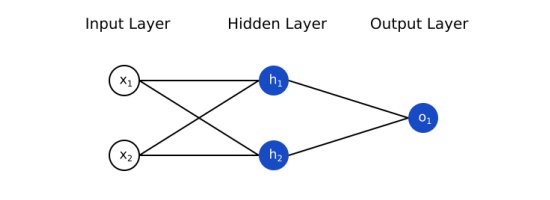

In [26]:
import numpy as np

# Define the input layer
x = np.array([2, 3])

# Define the weights and biases for the hidden layers and the output layer
w1 = np.array([[0.1, 0.4], [0.2, 0.5]])
b1 = np.array([0.3, 0.4])
w2 = np.array([[0.2], [0.1]])
b2 = np.array([0.5])

# Compute the activations for the first hidden layer
a1 = np.dot(x, w1) + b1
z1 = 1 / (1 + np.exp(-a1))  # Sigmoid activation function

# Compute the activations for the second hidden layer
a2 = np.dot(z1, w2) + b2
z2 = 1 / (1 + np.exp(-a2))  # Sigmoid activation function

# Print the output of the network
print("Output:", z2)


Output: [0.67781636]


Question 3: Implement the following activation functions:

> 1.   ReLu



In [7]:
def relu(x):
    """
    ReLU activation function
    """
    return np.maximum(0, x)

In [8]:
x = 4
output = relu(x)
print(output) # Output: 4

x = -7
output = relu(x)
print(output) # Output: 0

4
0




> 2.   Leaky ReLu



In [12]:
def leaky_relu(x, alpha=0.1):
    """
    Leaky ReLU activation function.
    """
    return max(alpha*x, x)

# Test the function with a sample input
x = 8
output = leaky_relu(x)
print(output)  # Output: -8

8


Question 4: Below is the image. Observe the model and define through Boltzmann Learning in terms of code:


> 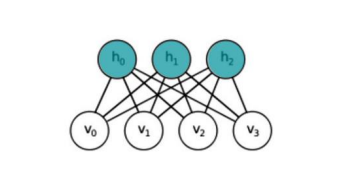



In [30]:
import tensorflow as tf

class RBM(object):
    def __init__(self, visible_dim, hidden_dim, learning_rate, number_of_iterations):
        
        self.graph = tf.Graph()
        
        #Initialize graph
        with self.graph.as_default():
            
            self.num_iter = number_of_iterations
            self.visi_biases = tf.Variable(tf.random_uniform([1, visible_dim], 0, 1, name="visi_biases"))
            self.hidd_biases = tf.Variable(tf.random_uniform([1, hidden_dim], 0, 1, name="hidd_biases"))
            self.hidd_states = tf.Variable(tf.zeros([1, hidden_dim], tf.float32, name="hidd_states"))
            self.visi_cdstat = tf.Variable(tf.zeros([1, visible_dim], tf.float32, name="visi_cdstat"))
            self.hidd_cdstat = tf.Variable(tf.zeros([1, hidden_dim], tf.float32, name="hidd_cdstat"))
            self.weights = tf.Variable(tf.random_normal([visible_dim, hidden_dim], 0.01), name="weights")
            self.learning_rate = tf.Variable(tf.fill([visible_dim, hidden_dim], learning_rate), name="learning_rate")
            
            self.input_sample = tf.placeholder(tf.float32, [visible_dim], name="input_sample")
            
            # Gibbs Sampling
            input_matrix = tf.transpose(tf.stack([self.input_sample for i in range(hidden_dim)]))
            hidden_probabilities = tf.sigmoid(tf.add(tf.multiply(input_matrix, self.weights), tf.stack([self.hidd_biases[0] for i in range(visible_dim)])))
            self.hidd_states = self.callculate_state(hidden_probabilities)
            visible_probabilities = tf.sigmoid(tf.add(tf.multiply(self.hidd_states, self.weights), tf.transpose(tf.stack([self.visi_biases[0] for i in range(hidden_dim)]))))
            self.visi_cdstat = self.callculate_state(visible_probabilities)
            self.hidd_cdstat = self.callculate_state(tf.sigmoid(tf.multiply(self.visi_cdstat, self.weights) + self.hidd_biases))
            
            #Contrastive Divergence
            positive_gradient_matrix = tf.multiply(input_matrix, self.hidd_states)
            negative_gradient_matrix = tf.multiply(self.visi_cdstat, self.hidd_cdstat)
            
            new_weights = self.weights
            new_weights.assign_add(tf.multiply(positive_gradient_matrix, self.learning_rate))
            new_weights.assign_sub(tf.multiply(negative_gradient_matrix, self.learning_rate))

            self.training = tf.assign(self.weights, new_weights) 
            
            #Initilize session and run it
            self.sess = tf.Session()
            initialization = tf.global_variables_initializer()
            self.sess.run(initialization)
        
    def train(self, input_vects):
        for iter_no in range(self.num_iter):
            for input_vect in input_vects:
                self.sess.run(self.training,
                               feed_dict={self.input_sample: input_vect})
    
    def callculate_state(self, probability):
        return tf.floor(probability + tf.random_uniform(tf.shape(probability), 0, 1))


Question 5: Below is the set of documents. Implement the vectorization techniques studied in class:
> sents = ['coronavirus is a highly infectious disease',

> 'coronavirus affects older people the most',

> 'older people are at high risk due to this disease']

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the set of documents
sents = ['coronavirus is a highly infectious disease',
         'coronavirus affects older people the most',
         'older people are at high risk due to this disease']

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer to the documents and transform the documents to their TF-IDF vectors
tfidf_vectors = tfidf.fit_transform(sents)

# Print the vocabulary and the TF-IDF vectors for the documents
print("Vocabulary:", tfidf.vocabulary_)
for i in range(len(sents)):
    print("TF-IDF vector for sentence", i+1, ":", tfidf_vectors[i].toarray())


Vocabulary: {'coronavirus': 3, 'is': 9, 'highly': 7, 'infectious': 8, 'disease': 4, 'affects': 0, 'older': 11, 'people': 12, 'the': 14, 'most': 10, 'are': 1, 'at': 2, 'high': 6, 'risk': 13, 'due': 5, 'to': 16, 'this': 15}
TF-IDF vector for sentence 1 : [[0.         0.         0.         0.37302199 0.37302199 0.
  0.         0.49047908 0.49047908 0.49047908 0.         0.
  0.         0.         0.         0.         0.        ]]
TF-IDF vector for sentence 2 : [[0.45954803 0.         0.         0.34949812 0.         0.
  0.         0.         0.         0.         0.45954803 0.34949812
  0.34949812 0.         0.45954803 0.         0.        ]]
TF-IDF vector for sentence 3 : [[0.         0.338348   0.338348   0.         0.25732238 0.338348
  0.338348   0.         0.         0.         0.         0.25732238
  0.25732238 0.338348   0.         0.338348   0.338348  ]]
